In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx

In [39]:
from demo_scripts import current_dir
from digital_design_dataset.dataset.design_source_dataset import DesignSourceDataset
from digital_design_dataset.flows.verilog_ast import verilog_ast

In [ ]:
current_script_dir = current_dir()
print(current_script_dir)

test_db_dir = current_script_dir / "test_dataset"

test_dataset = DesignSourceDataset(test_db_dir)

design_0 = test_dataset.get_all_verilog_files()[0]

In [47]:
ast_tree = verilog_ast(design_0)

In [48]:
# graph stats
print(f"Number of nodes: {ast_tree.number_of_nodes()}")
print(f"Number of edges: {ast_tree.number_of_edges()}")
print(f"Diameter: {nx.diameter(ast_tree)}")
print(f"Average shortest path length: {nx.floyd_warshall_numpy(ast_tree).mean()}")

Number of nodes: 145
Number of edges: 574
Diameter: 17
Average shortest path length: 8.072580261593341


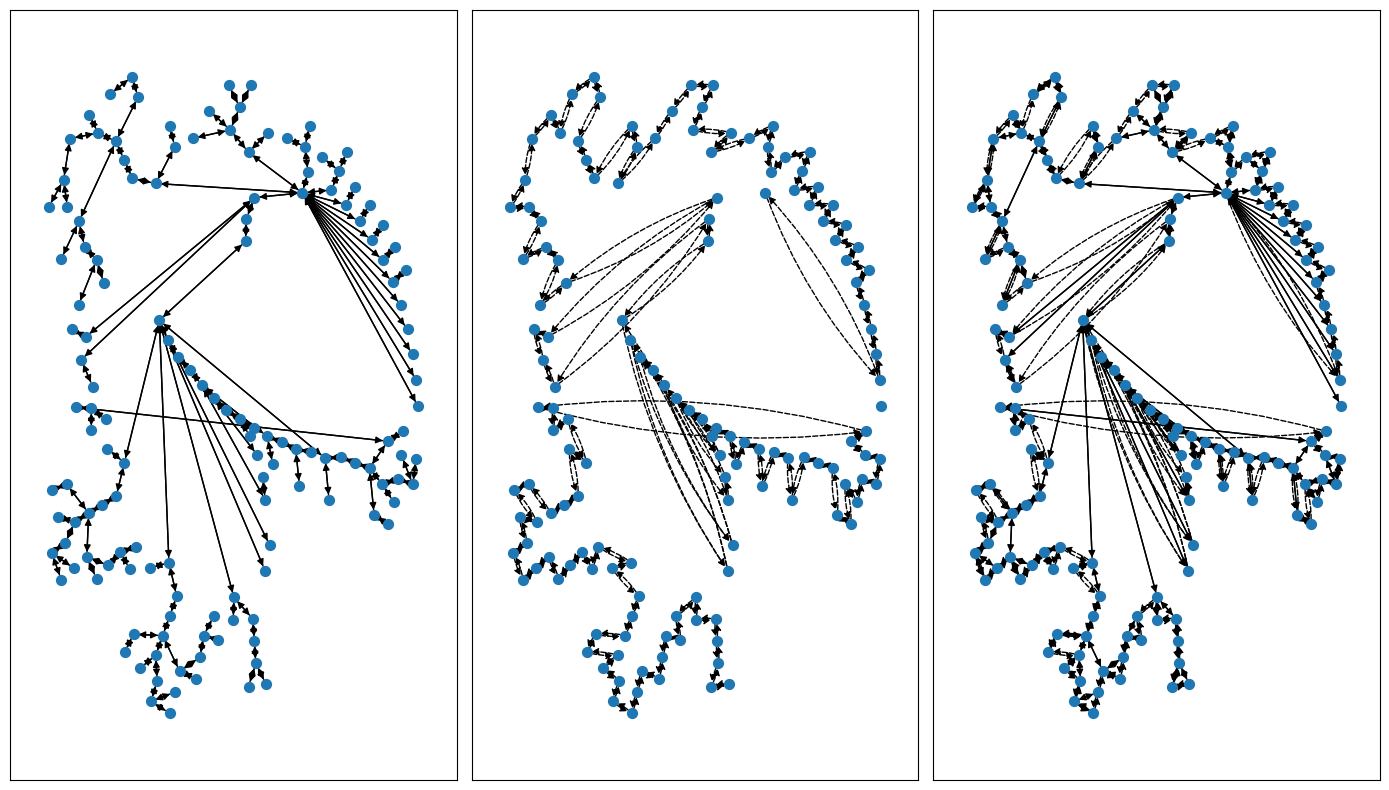

In [50]:
nx.nx_agraph.write_dot(
    ast_tree, current_script_dir / "figures" / "verilog_ast_tree.dot"
)

fig, ax = plt.subplots(1, 3, figsize=(14, 8))
edge_colors = {"ast": "blue", "nco": "red"}
pos = nx.nx_agraph.graphviz_layout(ast_tree, prog="twopi")
nx.draw_networkx_nodes(ast_tree, pos, ax=ax[0], node_size=50)
nx.draw_networkx_nodes(ast_tree, pos, ax=ax[1], node_size=50)
edges_ast = [
    edge
    for edge in ast_tree.edges(data=True)
    if edge[2]["t_edge_type"] in ["ast", "ast_reverse"]
]
edges_nco = [
    edge
    for edge in ast_tree.edges(data=True)
    if edge[2]["t_edge_type"] in ["nco", "nco_reverse"]
]
nx.draw_networkx_edges(ast_tree, pos, edgelist=edges_ast, ax=ax[0], node_size=50)
nx.draw_networkx_edges(
    ast_tree,
    pos,
    edgelist=edges_nco,
    ax=ax[1],
    node_size=50,
    style="dashed",
    connectionstyle="arc3,rad=0.1",
)

nx.draw_networkx_nodes(ast_tree, pos, ax=ax[2], node_size=50)
nx.draw_networkx_edges(ast_tree, pos, edgelist=edges_ast, ax=ax[2], node_size=50)
nx.draw_networkx_edges(
    ast_tree,
    pos,
    edgelist=edges_nco,
    ax=ax[2],
    node_size=50,
    style="dashed",
    connectionstyle="arc3,rad=0.1",
)

plt.tight_layout()
os.makedirs(current_script_dir / "figures", exist_ok=True)
plt.savefig(current_script_dir / "figures" / "verilog_ast_tree.png")